In [86]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import consumer_key,consumer_secret ,access_token,access_token_secret

In [137]:
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

text_tweet = []
date_tweet = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []
counter = 1
analyzer = SentimentIntensityAnalyzer()

target_account = "@BBCNews"
for x in range(1, 6):
    tweets = api.user_timeline(target_account, page=x)
    for tweet in tweets:

        text_tweet.append(tweet["text"])
        date_tweet.append(tweet["created_at"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        tweets_ago.append(counter)
        counter += 1

In [138]:
bbc_df = pd.DataFrame({"Twitter Account":"@BBCNews",
                       "Tweet Date":date_tweet,
                       "Tweet":text_tweet,
                       "Compound":compound_list,
                       "Positive":positive_list,
                       "Neutral":neutral_list,
                       "Negative":negative_list,
                       "Tweets Ago":tweets_ago
                      })
bbc_df=bbc_df[["Twitter Account","Tweet Date","Tweet","Compound","Positive","Neutral","Negative","Tweets Ago"]]
bbc_df.to_csv("bbc.csv", sep=',', encoding='utf-8')
bbc_df.head()

Twitter Account                      Tweet Date  \
0        @BBCNews  Tue Jun 19 02:46:04 +0000 2018   
1        @BBCNews  Tue Jun 19 02:46:04 +0000 2018   
2        @BBCNews  Tue Jun 19 02:43:57 +0000 2018   
3        @BBCNews  Tue Jun 19 02:13:46 +0000 2018   
4        @BBCNews  Tue Jun 19 02:13:46 +0000 2018   

                                               Tweet  Compound  Positive  \
0  A battle to save Indonesia's orang-utans https...    0.1531     0.327   
1  XXXTentacion: Rapper's volatile life made comp...    0.2263     0.213   
2  Apple fined for misleading customers in Austra...   -0.4019     0.000   
3  Trump threatens additional $200bn in tariffs o...   -0.3818     0.000   
4  Finsbury Park attack: Minute's silence held to...   -0.4767     0.000   

   Neutral  Negative  Tweets Ago  
0    0.408     0.265           1  
1    0.787     0.000           2  
2    0.722     0.278           3  
3    0.755     0.245           4  
4    0.744     0.256           5

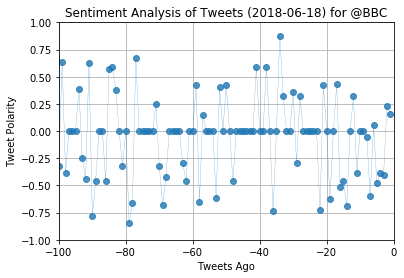

In [139]:
x_vals = bbc_df["Tweets Ago"]
y_vals = bbc_df["Compound"]
plt.plot(x_vals*-1,
         y_vals, marker="o", linewidth=0.25,
         alpha=0.8)


analysis_date = datetime.now()
analysis_date = analysis_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({analysis_date}) for @BBC")
plt.xlim(-100,0) 
plt.ylim(-1,1) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()
plt.savefig("bbc.png")
plt.show()




In [120]:
text_tweet = []
date_tweet = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []
counter = 1
analyzer = SentimentIntensityAnalyzer()

target_account = "@CBSNews"
for x in range(1, 6):
    tweets = api.user_timeline(target_account, page=x)
    for tweet in tweets:

        text_tweet.append(tweet["text"])
        date_tweet.append(tweet["created_at"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        tweets_ago.append(counter)
        counter += 1

In [121]:
cbs_df = pd.DataFrame({"Twitter Account":"@CBSNews",
                       "Tweet Date":date_tweet,
                       "Tweet":text_tweet,
                       "Compound":compound_list,
                       "Positive":positive_list,
                       "Neutral":neutral_list,
                       "Negative":negative_list,
                       "Tweets Ago":tweets_ago
                      })
cbs_df=cbs_df[["Twitter Account","Tweet Date","Tweet","Compound","Positive","Neutral","Negative","Tweets Ago"]]
cbs_df.to_csv("cbs.csv", sep=',', encoding='utf-8')
cbs_df.head()

Twitter Account                      Tweet Date  \
0        @CBSNews  Tue Jun 19 04:18:04 +0000 2018   
1        @CBSNews  Tue Jun 19 04:03:04 +0000 2018   
2        @CBSNews  Tue Jun 19 04:01:03 +0000 2018   
3        @CBSNews  Tue Jun 19 03:48:04 +0000 2018   
4        @CBSNews  Tue Jun 19 03:33:03 +0000 2018   

                                               Tweet  Compound  Positive  \
0  Bear jumps off skateboard and attacks circus h...   -0.7650     0.000   
1  Burned skeletal remains on ranch believed to b...   -0.2960     0.000   
2  British royal family announced first same-sex ...    0.4824     0.173   
3  Texas deputy sexually abused undocumented immi...   -0.5106     0.000   
4  Actress tweets video of husband's Tesla bursti...    0.0000     0.000   

   Neutral  Negative  Tweets Ago  
0    0.663     0.337           1  
1    0.864     0.136           2  
2    0.827     0.000           3  
3    0.769     0.231           4  
4    1.000     0.000           5

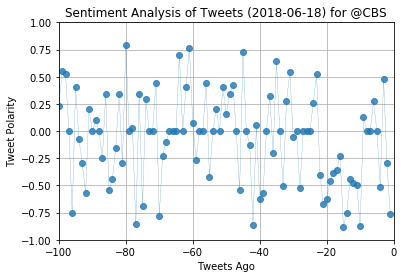

In [122]:
x_vals = cbs_df["Tweets Ago"]
y_vals = cbs_df["Compound"]
plt.plot(x_vals*-1,
         y_vals, marker="o", linewidth=0.25,
         alpha=0.8)


analysis_date = datetime.now()
analysis_date = analysis_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({analysis_date}) for @CBS")
plt.xlim(-100,0) 
plt.ylim(-1,1) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()
plt.savefig("cbs.png")
plt.show()



In [123]:
text_tweet = []
date_tweet = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []
counter = 1
analyzer = SentimentIntensityAnalyzer()

target_account = "@CNN"
for x in range(1, 6):
    tweets = api.user_timeline(target_account, page=x)
    for tweet in tweets:

        text_tweet.append(tweet["text"])
        date_tweet.append(tweet["created_at"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        tweets_ago.append(counter)
        counter += 1

In [124]:
cnn_df = pd.DataFrame({"Twitter Account":"@CNN",
                       "Tweet Date":date_tweet,
                       "Tweet":text_tweet,
                       "Compound":compound_list,
                       "Positive":positive_list,
                       "Neutral":neutral_list,
                       "Negative":negative_list,
                       "Tweets Ago":tweets_ago
                      })
cnn_df=cnn_df[["Twitter Account","Tweet Date","Tweet","Compound","Positive","Neutral","Negative","Tweets Ago"]]
cnn_df.to_csv("cnn.csv", sep=',', encoding='utf-8')
cnn_df.head()

Twitter Account                      Tweet Date  \
0            @CNN  Tue Jun 19 04:16:04 +0000 2018   
1            @CNN  Tue Jun 19 04:01:10 +0000 2018   
2            @CNN  Tue Jun 19 03:46:03 +0000 2018   
3            @CNN  Tue Jun 19 03:38:03 +0000 2018   
4            @CNN  Tue Jun 19 03:37:18 +0000 2018   

                                               Tweet  Compound  Positive  \
0  There was no call between US and North Korean ...   -0.2960     0.000   
1  "Black Panther" star Chadwick Boseman was acce...    0.7845     0.331   
2  Facing mounting outcry and contradictory state...   -0.6908     0.000   
3  Shares in Chinese tech firm ZTE plummeted more...   -0.2732     0.139   
4  RT @CNNTonight: "It's the people who are the v...   -0.3182     0.000   

   Neutral  Negative  Tweets Ago  
0    0.896     0.104           1  
1    0.669     0.000           2  
2    0.695     0.305           3  
3    0.717     0.143           4  
4    0.909     0.091           5

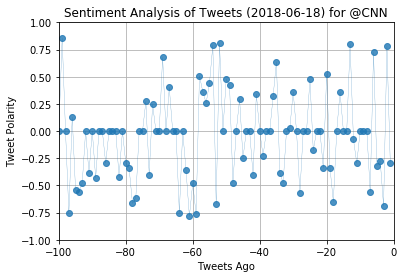

In [125]:
x_vals = cnn_df["Tweets Ago"]
y_vals = cnn_df["Compound"]
plt.plot(x_vals*-1,
         y_vals, marker="o", linewidth=0.25,
         alpha=0.8)


analysis_date = datetime.now()
analysis_date = analysis_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({analysis_date}) for @CNN")
plt.xlim(-100,0) 
plt.ylim(-1,1) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()
plt.savefig("cnn.png")
plt.show()



In [126]:
text_tweet = []
date_tweet = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []
counter = 1
analyzer = SentimentIntensityAnalyzer()

target_account = "@FOXNews"
for x in range(1, 6):
    tweets = api.user_timeline(target_account, page=x)
    for tweet in tweets:

        text_tweet.append(tweet["text"])
        date_tweet.append(tweet["created_at"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        tweets_ago.append(counter)
        counter += 1

In [127]:
fox_df = pd.DataFrame({"Twitter Account":"@FoxNews",
                       "Tweet Date":date_tweet,
                       "Tweet":text_tweet,
                       "Compound":compound_list,
                       "Positive":positive_list,
                       "Neutral":neutral_list,
                       "Negative":negative_list,
                       "Tweets Ago":tweets_ago
                      })
fox_df=fox_df[["Twitter Account","Tweet Date","Tweet","Compound","Positive","Neutral","Negative","Tweets Ago"]]
fox_df.to_csv("fox.csv", sep=',', encoding='utf-8')
fox_df.head()

Twitter Account                      Tweet Date  \
0        @FoxNews  Tue Jun 19 04:30:00 +0000 2018   
1        @FoxNews  Tue Jun 19 04:23:00 +0000 2018   
2        @FoxNews  Tue Jun 19 04:15:00 +0000 2018   
3        @FoxNews  Tue Jun 19 04:10:44 +0000 2018   
4        @FoxNews  Tue Jun 19 04:05:00 +0000 2018   

                                               Tweet  Compound  Positive  \
0  A young girl who hates taking naps escaped her...   -0.0516     0.131   
1  At the National Space Council meeting, @POTUS ...    0.3400     0.179   
2  .@David_Bossie: "Let's not forget that if pare...    0.1695     0.089   
3  Sessions rebukes critics who compare border si...   -0.2960     0.000   
4  Carjacking suspect dead outside @Walmart store...   -0.7579     0.000   

   Neutral  Negative  Tweets Ago  
0    0.728     0.141           1  
1    0.821     0.000           2  
2    0.911     0.000           3  
3    0.872     0.128           4  
4    0.667     0.333           5

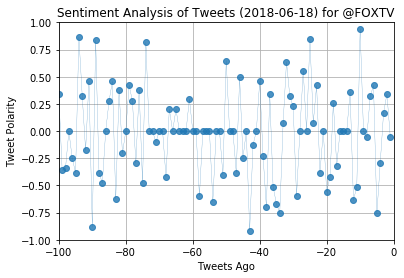

In [128]:
x_vals = fox_df["Tweets Ago"]
y_vals = fox_df["Compound"]
plt.plot(x_vals*-1,
         y_vals, marker="o", linewidth=0.25,
         alpha=0.8)


analysis_date = datetime.now()
analysis_date = analysis_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({analysis_date}) for @FOXTV")
plt.xlim(-100,0) 
plt.ylim(-1,1) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()
plt.savefig("fox.png")
plt.show()



In [130]:
text_tweet = []
date_tweet = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []
counter = 1
analyzer = SentimentIntensityAnalyzer()

target_account = "@NYTimes"
for x in range(1, 6):
    tweets = api.user_timeline(target_account, page=x)
    for tweet in tweets:

        text_tweet.append(tweet["text"])
        date_tweet.append(tweet["created_at"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        tweets_ago.append(counter)
        counter += 1

In [131]:
nyt_df = pd.DataFrame({"Twitter Account":"@NYTimes",
                       "Tweet Date":date_tweet,
                       "Tweet":text_tweet,
                       "Compound":compound_list,
                       "Positive":positive_list,
                       "Neutral":neutral_list,
                       "Negative":negative_list,
                       "Tweets Ago":tweets_ago
                      })
nyt_df=nyt_df[["Twitter Account","Tweet Date","Tweet","Compound","Positive","Neutral","Negative","Tweets Ago"]]
nyt_df.to_csv("nyt.csv", sep=',', encoding='utf-8')
nyt_df.head()

Twitter Account                      Tweet Date  \
0        @NYTimes  Tue Jun 19 04:22:05 +0000 2018   
1        @NYTimes  Tue Jun 19 04:02:01 +0000 2018   
2        @NYTimes  Tue Jun 19 03:56:52 +0000 2018   
3        @NYTimes  Tue Jun 19 03:47:04 +0000 2018   
4        @NYTimes  Tue Jun 19 03:32:06 +0000 2018   

                                               Tweet  Compound  Positive  \
0  RT @nytopinion: If Republican lawmakers have a...    0.0516     0.102   
1  A hat said to be Napoleon's has been auctioned...    0.0000     0.000   
2  IBM Unveils System That ‘Debates’ With Humans ...    0.0000     0.000   
3  The Trump administration's tariffs on aluminum...   -0.3818     0.000   
4  One of the trees in the Mariposa Grove of gian...    0.0000     0.000   

   Neutral  Negative  Tweets Ago  
0    0.805     0.093           1  
1    1.000     0.000           2  
2    1.000     0.000           3  
3    0.874     0.126           4  
4    1.000     0.000           5

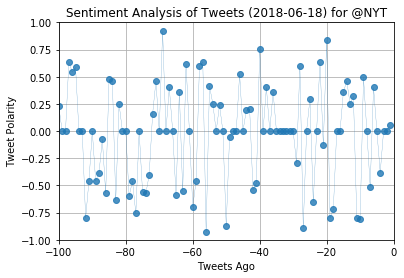

In [132]:
x_vals = nyt_df["Tweets Ago"]
y_vals = nyt_df["Compound"]
plt.plot(x_vals*-1,
         y_vals, marker="o", linewidth=0.25,
         alpha=0.8)


analysis_date = datetime.now()
analysis_date = analysis_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({analysis_date}) for @NYT")
plt.xlim(-100,0) 
plt.ylim(-1,1) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()

plt.savefig("nyt.png")
plt.show()



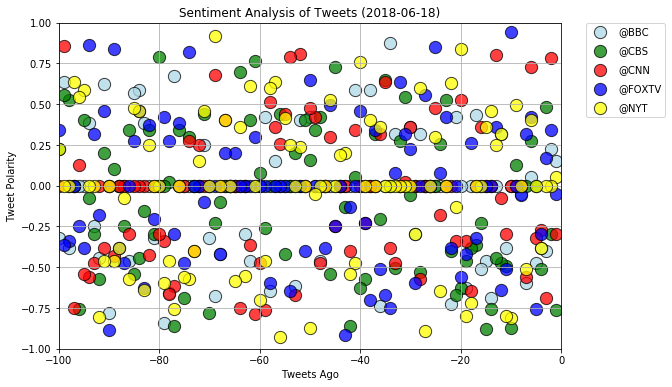

In [140]:
plt.figure(figsize=(9,6))
plt.scatter(bbc_df["Tweets Ago"]*-1,
         bbc_df["Compound"],s=150,c="lightblue",  marker='o',
            edgecolor="black", linewidths=1, alpha=0.75, label="@BBC")
plt.scatter(cbs_df["Tweets Ago"]*-1,
         cbs_df["Compound"],s=150,c="green",  marker='o',
            edgecolor="black", linewidths=1, alpha=0.75, label="@CBS")
plt.scatter(cnn_df["Tweets Ago"]*-1,
         cnn_df["Compound"],s=150,c="red",  marker='o',
            edgecolor="black", linewidths=1, alpha=0.75, label="@CNN")
plt.scatter(fox_df["Tweets Ago"]*-1,
         fox_df["Compound"],s=150,c="blue",  marker='o',
            edgecolor="black", linewidths=1, alpha=0.75, label="@FOXTV")
plt.scatter(nyt_df["Tweets Ago"]*-1,
         nyt_df["Compound"],s=150,c="yellow",  marker='o',
            edgecolor="black", linewidths=1, alpha=0.75, label="@NYT")
analysis_date = datetime.now()
analysis_date = analysis_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({analysis_date})")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(frameon= True,labelspacing= 0.9,bbox_to_anchor = (1.05,1),loc=2,borderaxespad=0.)
plt.xlim(-100,0)
plt.ylim(-1,1)
plt.grid(True)

plt.savefig("FinalAnalysis.png")
#Show plot
plt.show()

In [141]:
import numpy as np

bar_data_compound = []
bar_data_compound.append(bbc_df['Compound'].mean())
bar_data_compound.append(cbs_df['Compound'].mean())
bar_data_compound.append(cnn_df['Compound'].mean())
bar_data_compound.append(fox_df['Compound'].mean())
bar_data_compound.append(nyt_df['Compound'].mean())


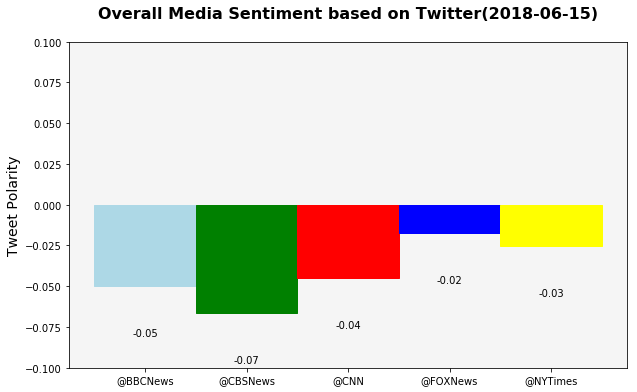

In [145]:
bar_data_labels = ["@BBCNews","@CBSNews","@CNN","@FOXNews","@NYTimes"]
barChartData = {'Name':bar_data_labels,'Overall':bar_data_compound}
chart_df = pd.DataFrame(barChartData)
ax = plt.figure(figsize=(10,6)).add_subplot(111)

ax.patch.set_facecolor('whitesmoke')
ch = ax.bar(chart_df['Name'],chart_df['Overall'],width = 1,)

ch[0].set_color('lightblue')
ch[1].set_color('green')
ch[2].set_color('red')
ch[3].set_color('blue')
ch[4].set_color('yellow')
#Print out its value on each bar chart
for i in range(len(ch)):
        height = ch[i].get_height()
        value=  round(chart_df['Overall'][i],2)
        if height<0:
            height = height-0.032
        elif height>0:
            height = height+0.02
            value = f"+{value}"
        ax.text(ch[i].get_x() + ch[i].get_width()/2, 1*height,value,
                ha='center', va='bottom')
ax.set_title(f"Overall Media Sentiment based on Twitter({now})\n", fontsize = 16,fontweight="bold")
ax.set_ylim(-0.1,0.1)
ax.set_ylabel('Tweet Polarity',fontsize = 14)
plt.savefig("OverallMediaSentiment.png")
plt.show()

## Analysis Notes

1. All networks results are on average negative in sentiment analysis performed.
2. BBC and CNN almost tied on the overall sentiments. Interesting results since these networks are in the oposite end of the spectrum in their point-of-view. BBC is considered conservative or right-wing and CNN is considered liberal or left-wing.
3. CBS News results were the most negative average sentiment.